# 1. Import packages & clean data
Fist of all, we need to load the required libraries, such as 

* [numpy](https://numpy.org/): To generate arrays <br>
* [matplotlib](https://matplotlib.org/): Vilsualization purpose <br>
* [seaborn](https://seaborn.pydata.org/): Distribution plots <br>
* os: to update working directory
* [pandas](https://pandas.pydata.org/docs/user_guide/index.html): DataFrames for tabular data.
* [missingno](): Visualize missing values in dataframe

In [2]:
# Load library:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import pandas as pd
import os
# import missingno as msnao 
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

# Change working directory, if needed:
# os.chdir('__directories__')

In [3]:
# Load DataFrame
df = pd.read_csv('Datasets/rodpump_failure.csv')

# Get life span of rod pump
df['lifespan'] = (pd.to_datetime(df.lifetime_end) - pd.to_datetime(df.lifetime_start))/ pd.Timedelta('1 days')

# Get subset of df whose failure type is not null
df = df[df['FAILURETYPE'].notnull()]

In [4]:
# List of columns in dataframe
df.columns

Index(['roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'lifetime_start',
       'lifetime_end', 'IDRECJOBPULL', 'REPORTTO', 'FAILSTART', 'FAILURETYPE',
       'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint',
       'StrokeLength', 'GrossStrokeLength', 'Fillage', 'YesterdaysAverageSPM',
       'bha_configuration', 'chemgroup1_any', 'chemgroup1_all',
       'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION', 'wellbore_category', 'manual_scale', 'packer_vs_tac',
       'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'AVG_WATERSG', 'rod_sinker_type', 'rod_has_guides',
       'rod_make', 'rod_apigrade', 'ROUTE', 'overall_max_sideload',
       'shallow_max_sideload', 'max_unguided_sideload', 'DESANDDEGAS_TYP',
       'CHROME_LENGTH', 'ENDURALLOY_LEN

In [5]:
# Selecte valid columns
list_all = []
list_WellUID = ['roduid']
list_Target = ['lifespan', 'FAILURETYPE']
list_predictor = ['H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint', 'StrokeLength',
                 'GrossStrokeLength', 'Fillage', 'bha_configuration', 
                 'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
                 'MAX_INCLINATION', 'manual_scale', 'packer_vs_tac', 
                 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
                 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME',
                 'rod_sinker_type', 'rod_has_guides', 'rod_make','rod_apigrade',
                 'ROUTE', 'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload',
                 'DESANDDEGAS_TYP', 'NIPPLE_SET_DEPTH', 'pump_bore']
list_all.extend(list_WellUID);
list_all.extend(list_Target); 
list_all.extend(list_predictor);

df = df.loc[:,list_all]

In [6]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

roduid                    object
lifespan                 float64
FAILURETYPE               object
H2S_CONCENTRATION        float64
PrimarySetpoint          float64
SecondarySetpoint        float64
StrokeLength             float64
GrossStrokeLength        float64
Fillage                  float64
bha_configuration         object
max_unguided_dls         float64
dls_high_in_hole         float64
gas_anchor_length        float64
MAX_INCLINATION          float64
manual_scale              object
packer_vs_tac             object
AVG_PRESS_FLOWLINE       float64
AVG_PRESSURE_TUBING      float64
AVG_PRESSURE_CASING      float64
AVG_OIL_VOLUME           float64
AVG_WATER_VOLUME         float64
AVG_LIQUID_VOLUME        float64
rod_sinker_type           object
rod_has_guides              bool
rod_make                  object
rod_apigrade              object
ROUTE                      int64
overall_max_sideload     float64
shallow_max_sideload     float64
max_ungui

In [7]:
# Drop missing values
df = df.dropna(inplace=False, axis=0);

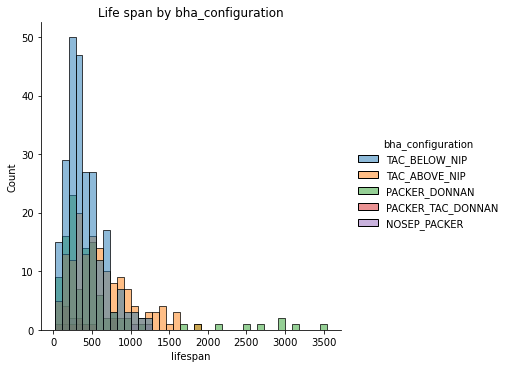

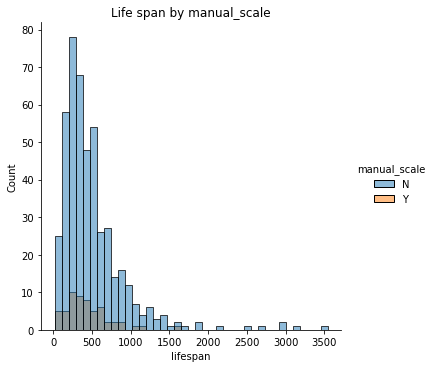

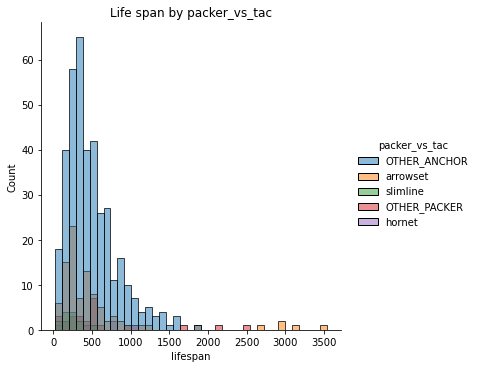

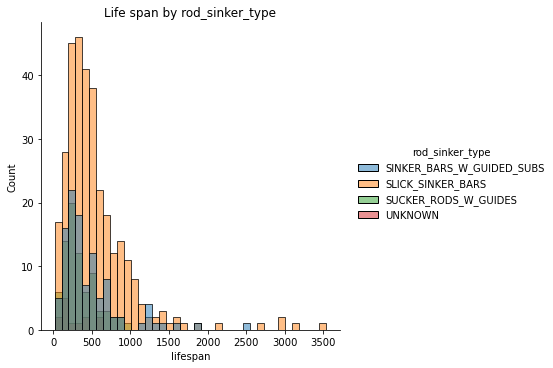

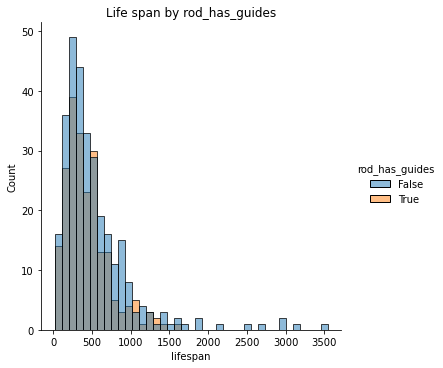

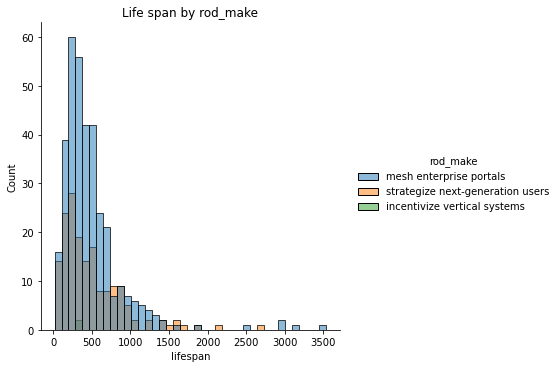

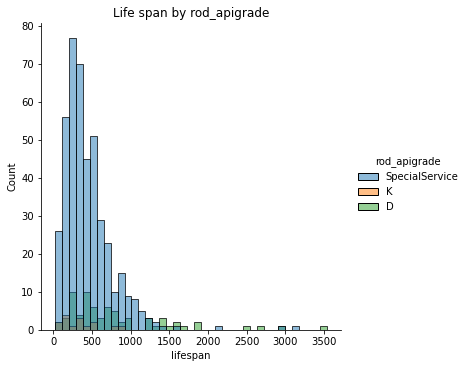

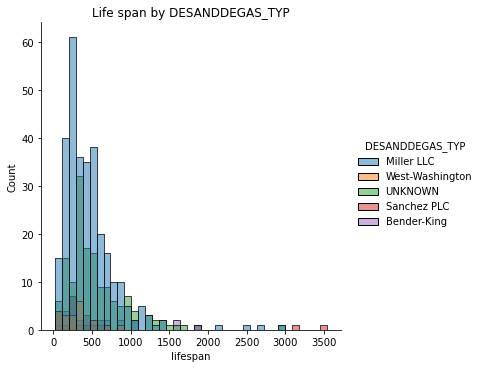

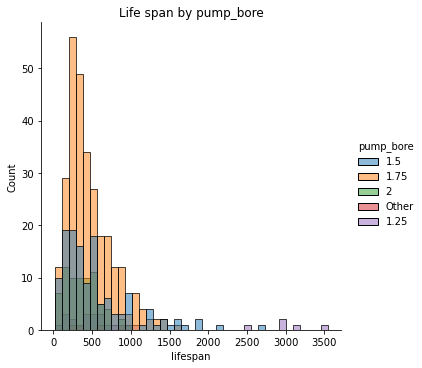

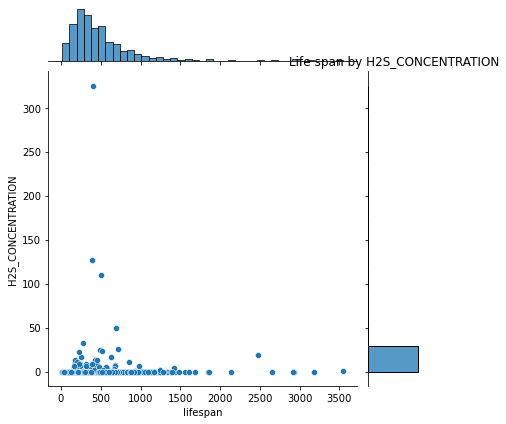

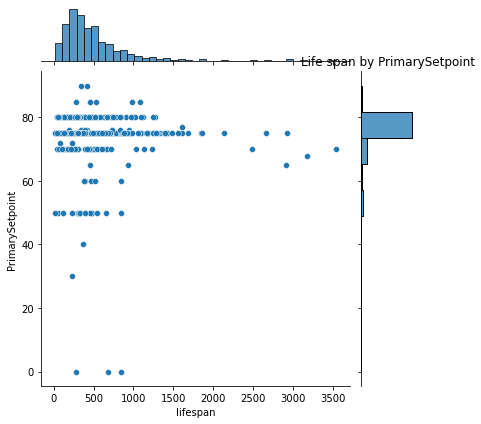

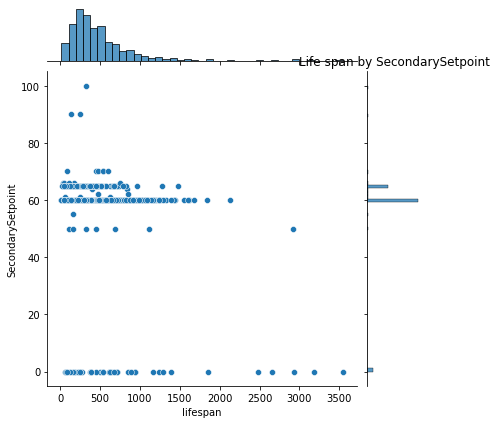

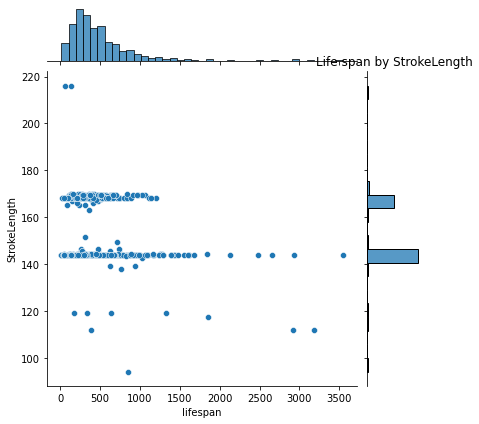

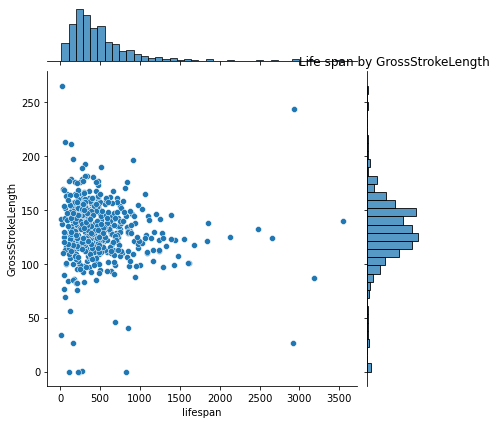

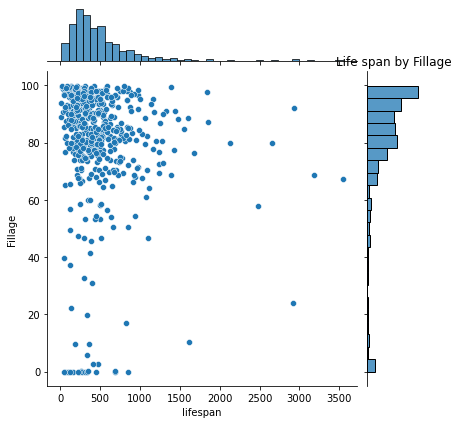

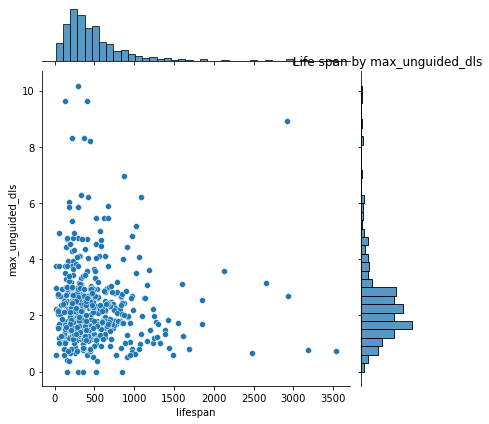

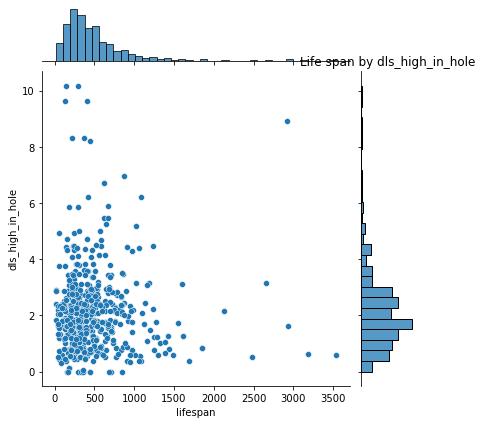

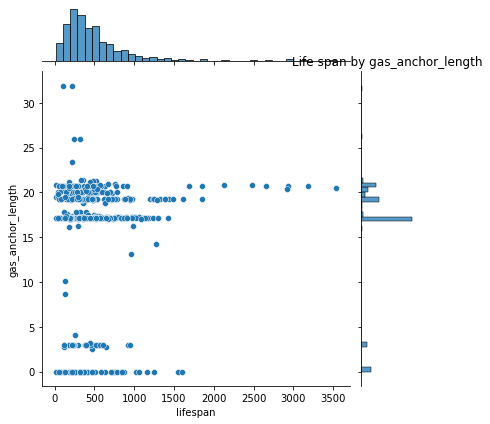

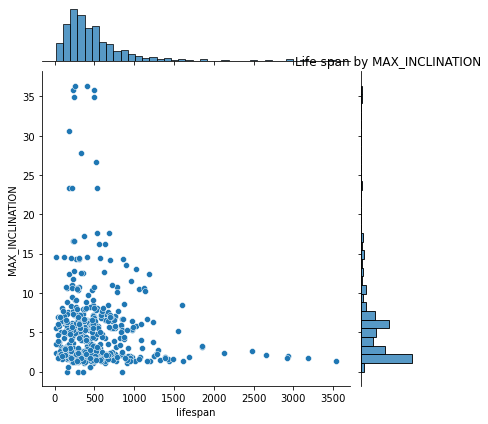

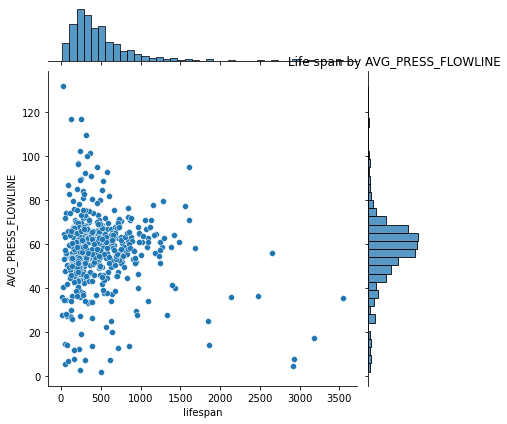

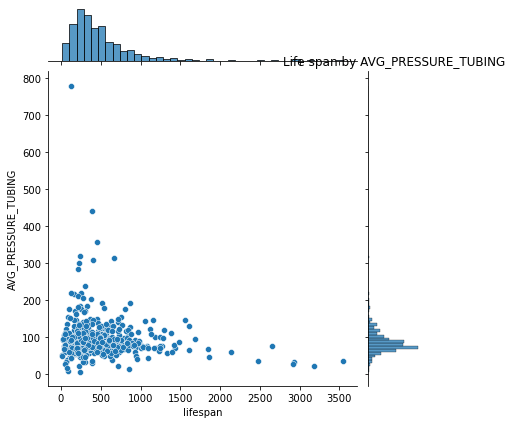

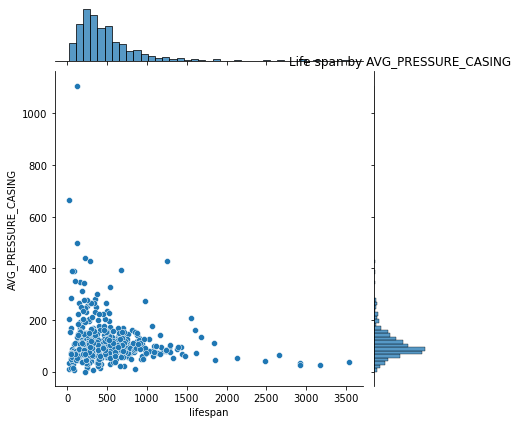

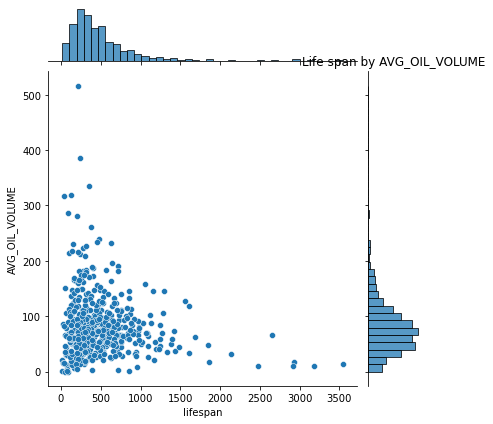

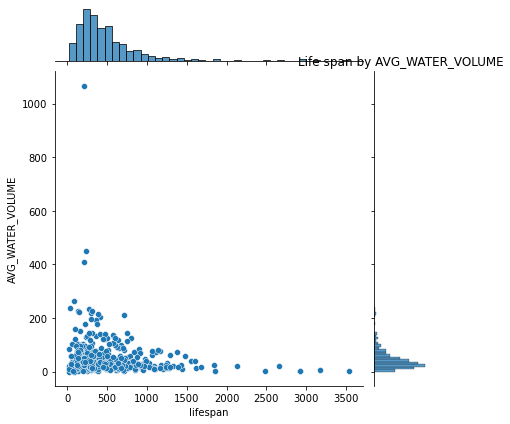

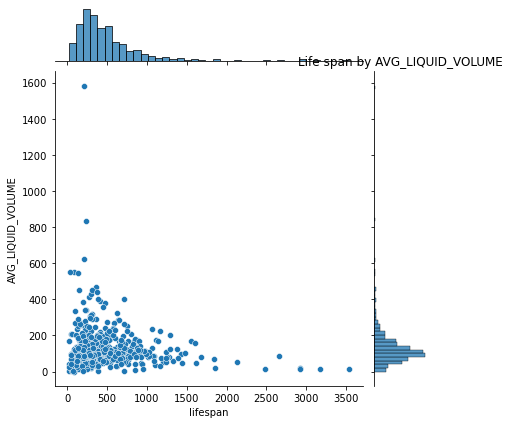

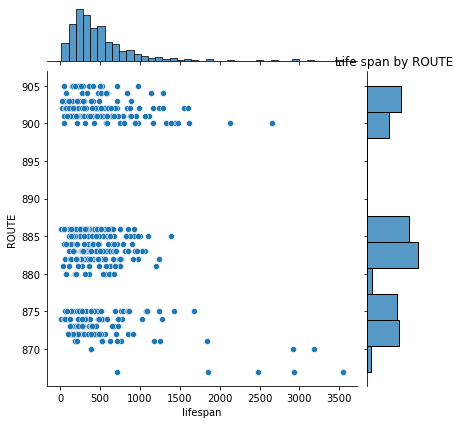

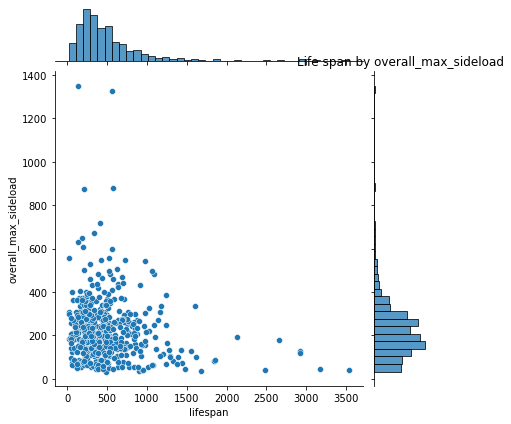

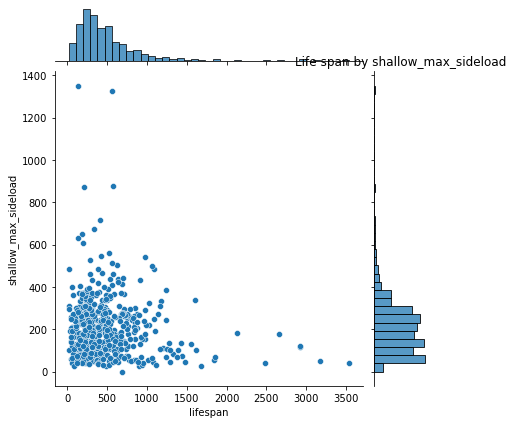

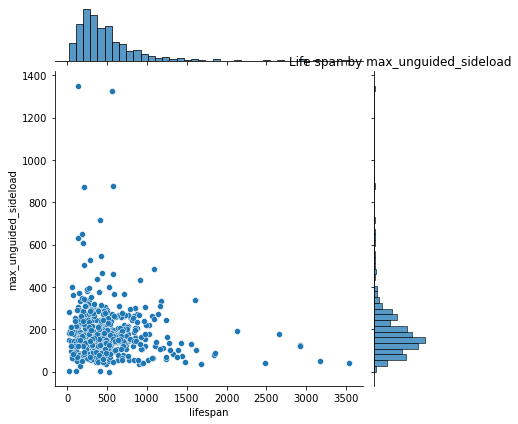

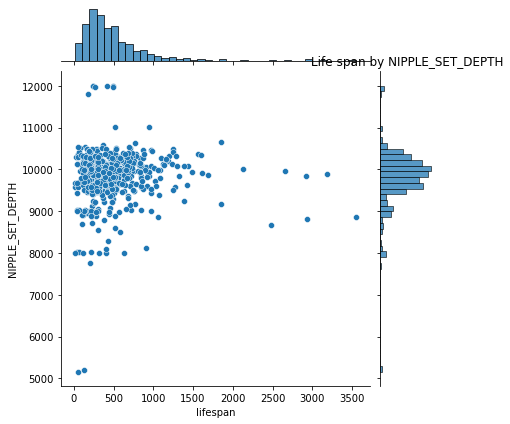

In [8]:
# Feature selection from visual inspection - Life span
for name in list_predictor_categorical:
    # Compare lifespans depending on Categorical variable
    sns.displot(data = df, x = 'lifespan', hue = name)
    plt.title('Life span by %s' %name);    
for name in list_predictor_continuous:
    # Compare lifespans depending on continuous variable
    sns.jointplot(data=df, x="lifespan", y = name)
    plt.title('Life span by %s' %name);

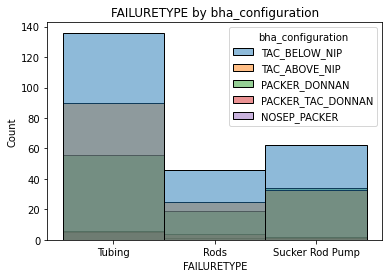

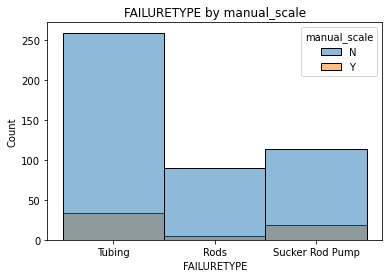

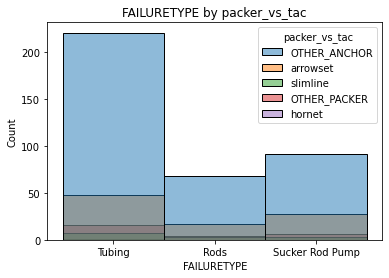

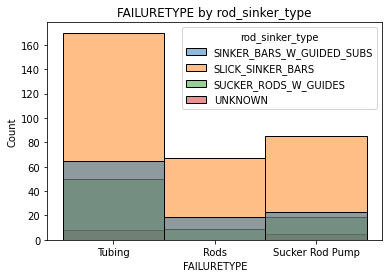

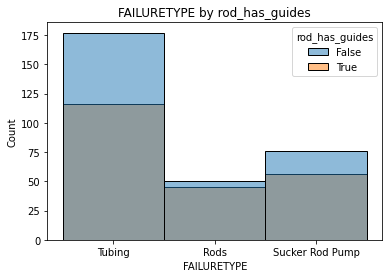

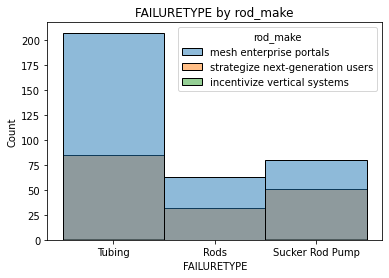

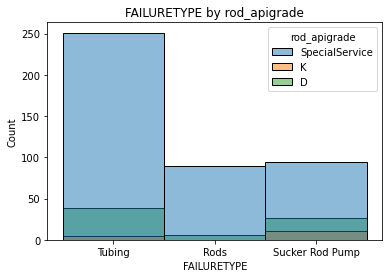

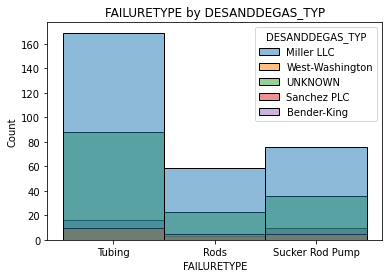

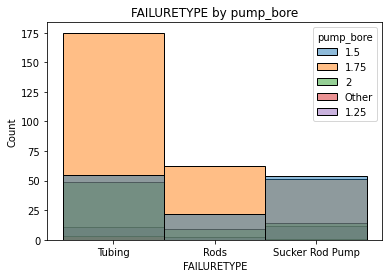

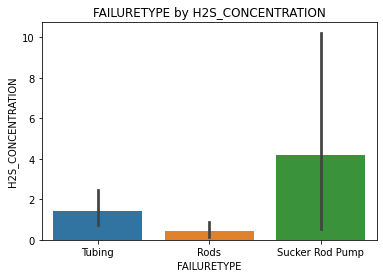

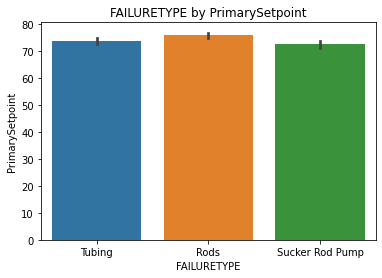

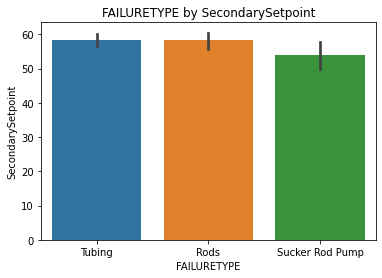

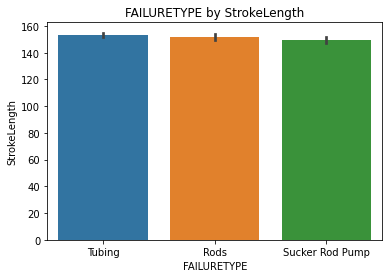

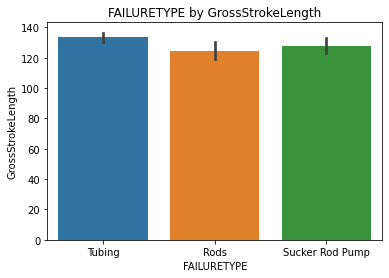

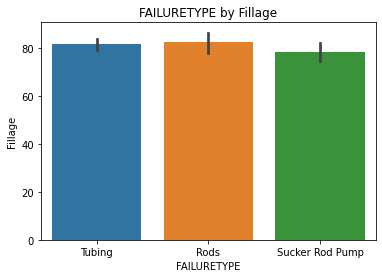

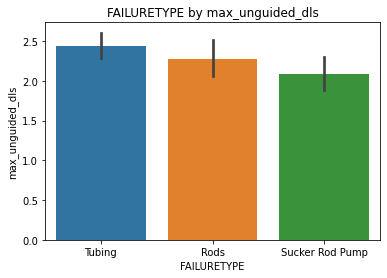

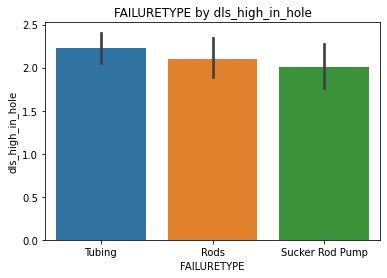

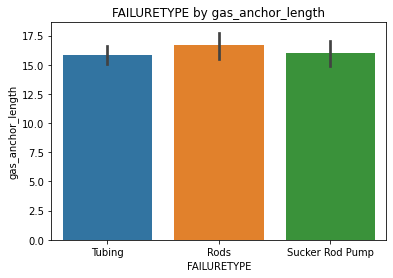

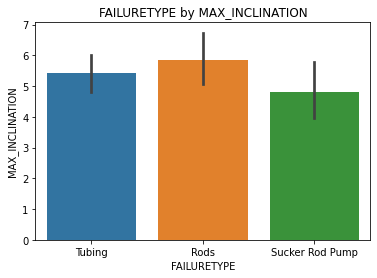

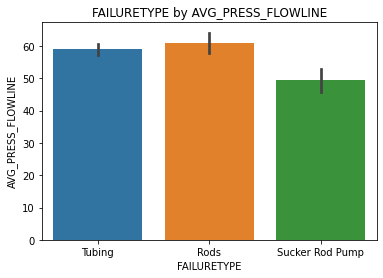

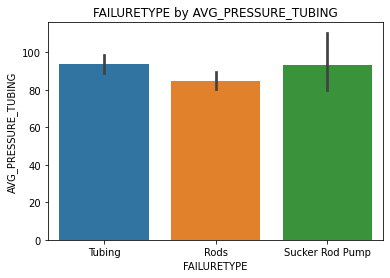

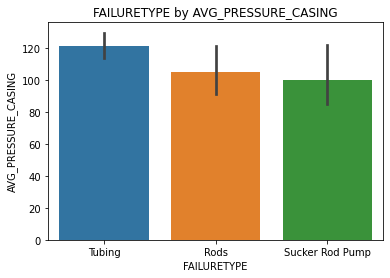

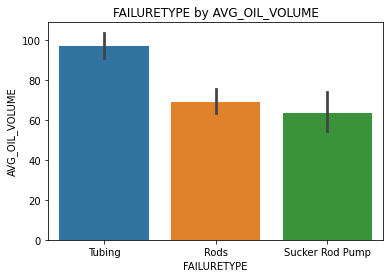

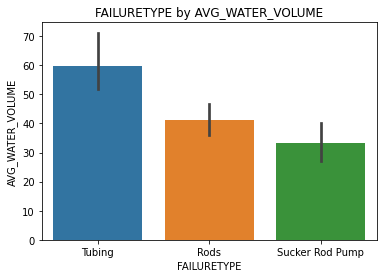

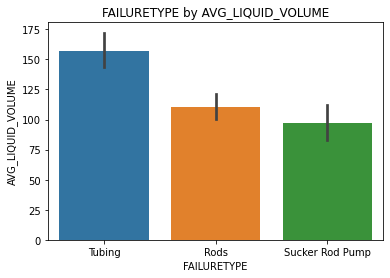

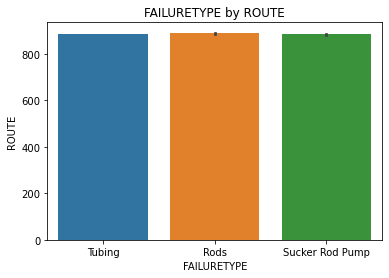

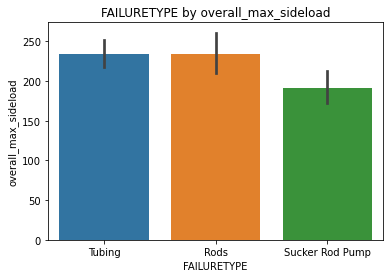

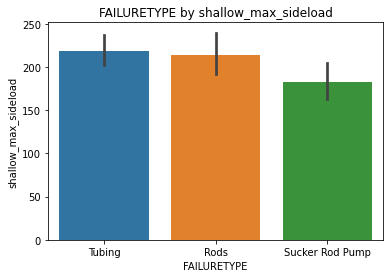

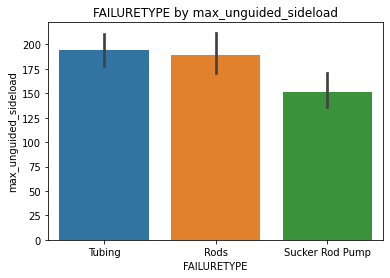

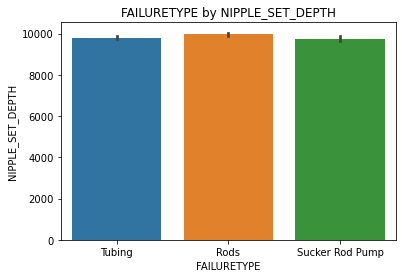

In [9]:
# Feature selection from visual inspection - Failure Type
for name in list_predictor_categorical:
    # Compare failure type depending on categorical variable
    plt.figure()
    sns.histplot(df, x="FAILURETYPE", hue = name, common_norm = False)
    plt.title('FAILURETYPE by %s' %name);
for name in list_predictor_continuous:
    # Compare failure type depending on continuous variable
    plt.figure()
    sns.barplot(data=df, x='FAILURETYPE' , y=name)
    plt.title('FAILURETYPE by %s' %name);

In [10]:
# Remove irrelevant predictor features:
list_predictor_continuous.remove('NIPPLE_SET_DEPTH')
list_predictor_continuous.remove('ROUTE')

In [11]:
# Remove Outliers
df = df.loc[df['Fillage'] < 300,:]

In [12]:
# Export Data Frame to CSV
df.to_csv(r'Datasets\Clean_Data.csv', index = False)

# 2. Statistical Analysis
* Summary statistics
* Univarite & bivariate analysis
* Spatial Distribution
* Outlier detection (not included)

In [13]:
# Summary statistics
df.describe()

,lifespan,H2S_CONCENTRATION,PrimarySetpoint,SecondarySetpoint,StrokeLength,GrossStrokeLength,Fillage,max_unguided_dls,dls_high_in_hole,gas_anchor_length,...,AVG_PRESSURE_TUBING,AVG_PRESSURE_CASING,AVG_OIL_VOLUME,AVG_WATER_VOLUME,AVG_LIQUID_VOLUME,ROUTE,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,NIPPLE_SET_DEPTH
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,486.440876,1.960577,74.034615,57.250000,152.244810,130.510007,80.824688,2.318366,2.149047,16.056212,...,91.846054,112.887909,83.368079,49.616672,132.984566,885.259615,223.239269,208.928923,182.396885,9814.288846
std,421.150868,16.441982,8.368371,16.277667,13.335971,28.510880,21.363310,1.361774,1.483057,6.303087,...,52.902042,83.118975,55.762379,65.112648,112.123344,11.016186,141.293859,143.657935,128.437302,621.480331
min,16.145833,0.000000,0.000000,0.000000,94.137931,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.300955,0.188793,0.000000,0.000000,0.023529,867.000000,33.480000,0.000000,0.000000,5166.100000
25%,231.343229,0.000000,75.000000,60.000000,144.000000,116.101536,77.128122,1.500000,1.186608,17.120000,...,68.976277,73.206963,48.898377,20.664552,77.674221,875.000000,136.715000,113.965000,113.942500,9582.675000
50%,380.989583,0.000000,75.000000,60.000000,144.039993,130.721768,85.820835,2.107417,1.860000,17.170000,...,81.187766,93.688165,73.825394,35.018803,112.355670,883.000000,200.985000,192.540000,156.550000,9893.750000
75%,602.208333,0.000000,75.000000,65.000000,168.020004,147.402187,95.003571,2.721818,2.719438,19.310000,...,99.875603,127.784029,102.679153,57.667421,159.275659,900.000000,278.820000,272.027500,224.440000,10141.125000
max,3542.000000,325.000000,90.000000,100.000000,216.119995,265.428571,99.900002,10.170000,10.170000,31.910000,...,778.412500,1107.539063,516.219455,1066.565759,1582.785214,905.000000,1351.030000,1351.030000,1351.030000,12002.300000


C:\Users\manol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


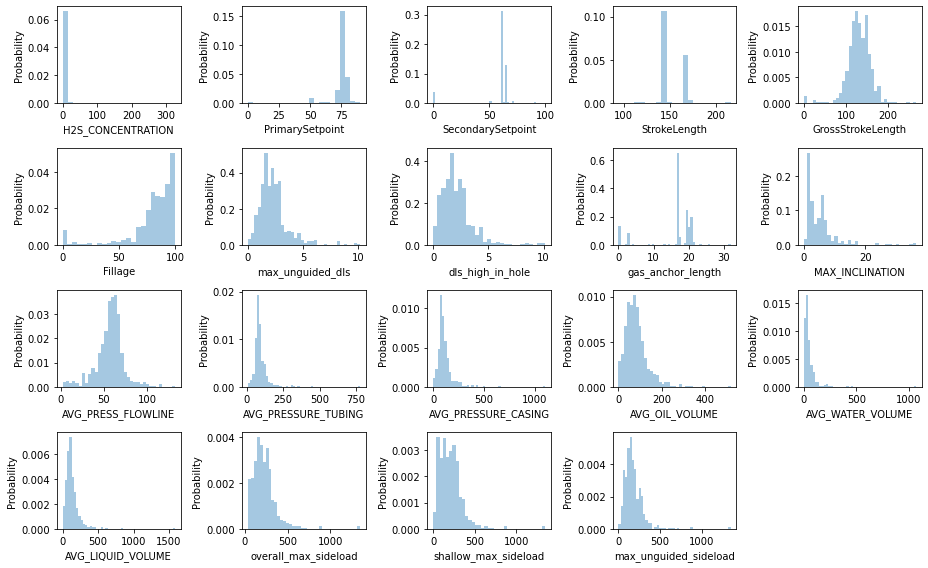

In [14]:
# Marginal distributions of variables: https://seaborn.pydata.org/generated/seaborn.distplot.html
plt.figure(figsize = (13,8))
for i, name in enumerate(list_predictor_continuous):
    plt.subplot(4,5,i+1);
    sns.distplot(df.loc[:,name], kde = False, norm_hist = True)
    plt.ylabel('Probability')
plt.tight_layout()

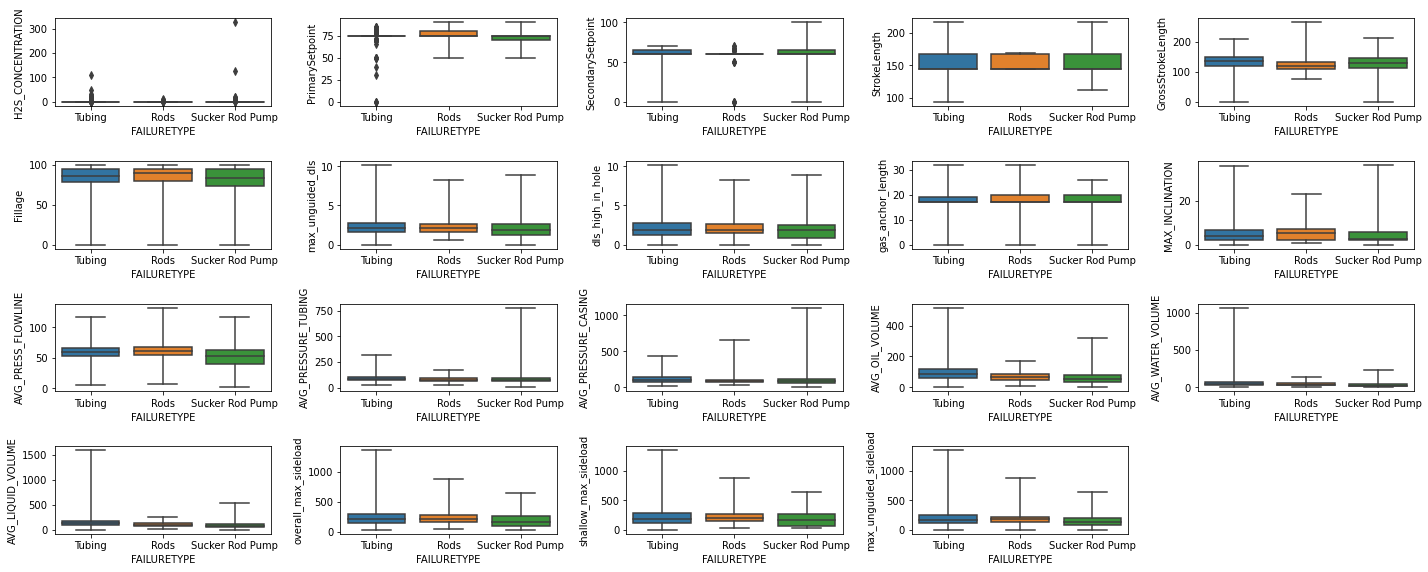

In [15]:
# Box plot of variables: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize = (20,8))
for i, name in enumerate(list_predictor_continuous):
    plt.subplot(4,5,i+1);
    sns.boxplot(x = "FAILURETYPE",y = name, data = df, whis= 100) # Default for whisker size = 1.5
plt.tight_layout()

In [ ]:
# bivariate scatter plot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
list_ = list_predictor_continuous.copy(); list_.append('FAILURETYPE')
sns.pairplot(df.loc[:,list_], hue = 'FAILURETYPE', corner=True, plot_kws = dict(alpha = 0.3, marker = '.'))

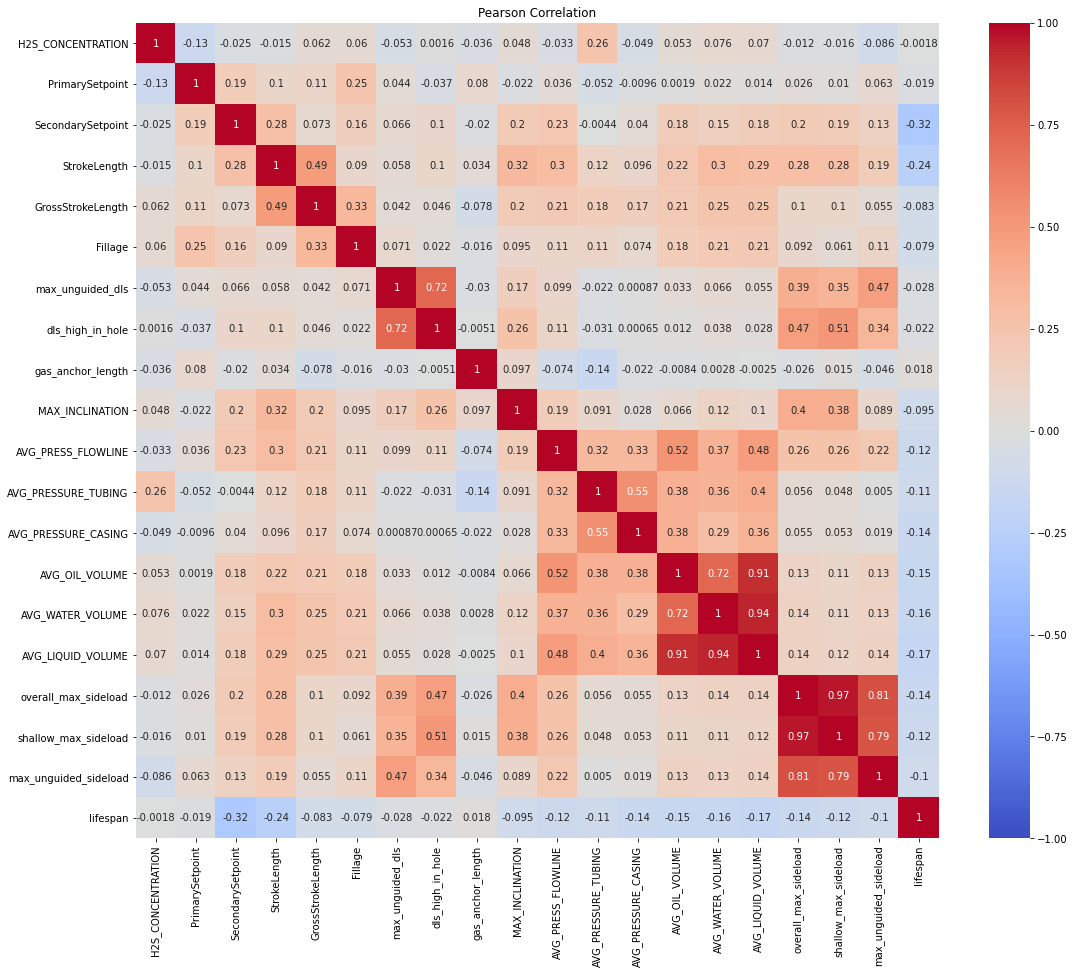

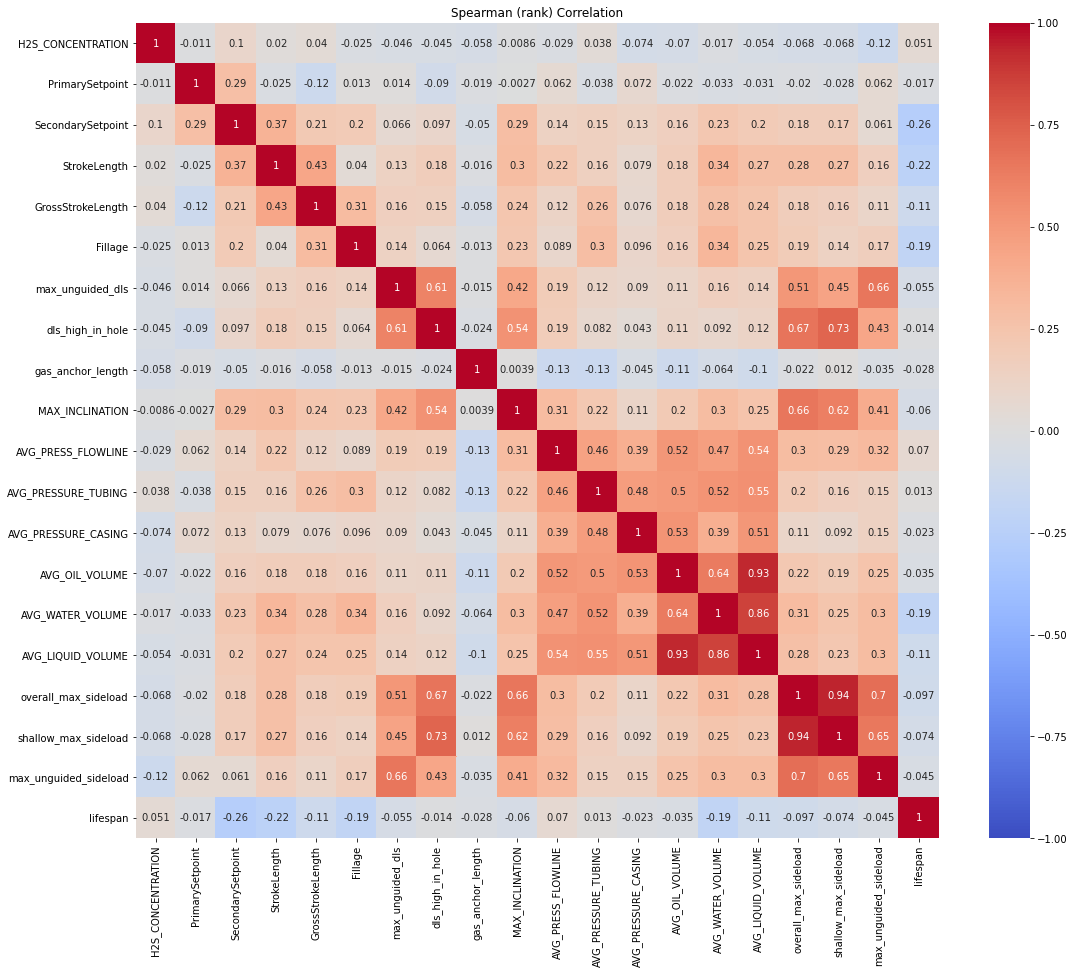

In [17]:
# Correlation Coefficient Matrix (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
list_ = list_predictor_continuous.copy(); list_.append('lifespan')
plt.figure(figsize = (18,15))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

plt.figure(figsize = (18,15))
plt.title('Spearman (rank) Correlation')
sns.heatmap(df.loc[:,list_].corr(method='spearman'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

In [18]:
print(df.loc[:,list_])

      H2S_CONCENTRATION  PrimarySetpoint  SecondarySetpoint  StrokeLength  \
1                   0.0             80.0               62.0    168.000000   
12                  0.0             80.0               65.0    168.000000   
15                  0.0             75.0               60.0    144.039724   
18                  3.0             80.0               60.0    144.000000   
22                  0.0             75.0               60.0    144.000000   
...                 ...              ...                ...           ...   
2531                0.0             75.0               60.0    144.000000   
2548                0.0             75.0               60.0    144.000000   
2551                0.0             75.0                0.0    144.199280   
2586               13.0             80.0               65.0    144.199997   
2593                0.0             75.0               60.0    168.039993   

      GrossStrokeLength    Fillage  max_unguided_dls  dls_high_in_hole  \
1

# 3. Data Preprocessing
* Normalize or Standardize continuous variable
* Encode categorical variable - Integer encoder for predictor, one-hot-encode for response ('failure type')

In [17]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras import *

We need to determine what should be predictor features (or variables) and target features (or variables). 

* **Predictor Features**
    *  Continuous - 'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint', 'StrokeLength', 'GrossStrokeLength', 'Fillage', 'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length', 'MAX_INCLINATION', 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME', overall_max_sideload', 'shallow_max_sideload', and 'max_unguided_sideload'
    *  Categorical - 'bha_configuration', 'manual_scale', 'packer_vs_tac', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 'rod_apigrade', 'DESANDDEGAS_TYP', 'pump_bore'
* **Response Features**: 'Life Span' (Continuous) and 'Failure Type' (Cateogorical)

In [18]:
# Convert pd.serise to np.array
Rredictor_Categorical = df.loc[:,list_predictor_categorical].values
Rredictor_Continuous = df.loc[:,list_predictor_continuous].values
Response_lifespan = df.loc[:,'lifespan'].values 
Response_failtype = df.loc[:,'FAILURETYPE'].values 

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)
enc_res = OneHotEncoder()
Response_failtype_en = enc_res.fit_transform(Response_failtype.reshape(-1,1)).todense()

# MinMax Transform for Continuous variable
scaler_pred = MinMaxScaler() # <- Keep this instance for inverse transform after prediction
Rredictor = np.concatenate([Rredictor_Continuous, Rredictor_Categorical_en], axis = 1) # <- Include encoded categorical to make the same range
Rredictor_scaled = scaler_pred.fit_transform(Rredictor)
scaler_res = MinMaxScaler()
Response_lifespan_scaled = scaler_res.fit_transform(Response_lifespan.reshape(-1,1))

# 4. ML - prediction model
We are done with data preprocessing... now we only need to do:
* Prediction for Failure Type
* Prediction for lifespan

## Failure Type prediction

In [19]:
# Split data into training and testing set: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rredictor_scaled, Response_failtype_en, test_size=0.10, random_state=77777)

In [20]:
# Tensorflow 2.1.0 version 
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [21]:
# Define Input and Output shape
input_shape = (Rredictor_scaled.shape[-1],)
n_class = Response_failtype_en.shape[-1]

# Build a Neural Network
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(n_class, activation='softmax'))

# Compile the Neural Network - define Loss and optimizer to tune the associated weights
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
# Sturcture of NN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1160      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 123       
Total params: 6,203
Trainable params: 6,203
Non-trainable params: 0
_________________________________________________________________


In [23]:
# training the Neural Network and saving metrics every 100 epochs
history = model.fit(X_train, y_train,
          batch_size=50, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100
10/10 - 0s - loss: 1.0704 - accuracy: 0.4637 - val_loss: 1.0022 - val_accuracy: 0.5962
Epoch 2/100
10/10 - 0s - loss: 0.9988 - accuracy: 0.5598 - val_loss: 0.9516 - val_accuracy: 0.5962
Epoch 3/100
10/10 - 0s - loss: 0.9804 - accuracy: 0.5598 - val_loss: 0.9426 - val_accuracy: 0.5962
Epoch 4/100
10/10 - 0s - loss: 0.9766 - accuracy: 0.5598 - val_loss: 0.9564 - val_accuracy: 0.5962
Epoch 5/100
10/10 - 0s - loss: 0.9719 - accuracy: 0.5598 - val_loss: 0.9478 - val_accuracy: 0.5962
Epoch 6/100
10/10 - 0s - loss: 0.9654 - accuracy: 0.5598 - val_loss: 0.9436 - val_accuracy: 0.5962
Epoch 7/100
10/10 - 0s - loss: 0.9621 - accuracy: 0.5598 - val_loss: 0.9392 - val_accuracy: 0.5962
Epoch 8/100
10/10 - 0s - loss: 0.9561 - accuracy: 0.5598 - val_loss: 0.9433 - val_accuracy: 0.5962
Epoch 9/100
10/10 - 0s - loss: 0.9522 - accuracy: 0.5598 - val_loss: 0.9343 - val_accuracy: 0.5962
Epoch 10/100
10/10 - 0s - loss: 0.9457 - accuracy: 0.5598 - val_loss: 0.9289 - val_accuracy: 0.5962
Epoch 11/

10/10 - 0s - loss: 0.3998 - accuracy: 0.8248 - val_loss: 0.9559 - val_accuracy: 0.7308
Epoch 84/100
10/10 - 0s - loss: 0.3905 - accuracy: 0.8462 - val_loss: 1.0171 - val_accuracy: 0.7500
Epoch 85/100
10/10 - 0s - loss: 0.3842 - accuracy: 0.8440 - val_loss: 1.0317 - val_accuracy: 0.6923
Epoch 86/100
10/10 - 0s - loss: 0.3838 - accuracy: 0.8611 - val_loss: 1.0147 - val_accuracy: 0.7115
Epoch 87/100
10/10 - 0s - loss: 0.3809 - accuracy: 0.8504 - val_loss: 0.9591 - val_accuracy: 0.6923
Epoch 88/100
10/10 - 0s - loss: 0.3733 - accuracy: 0.8419 - val_loss: 1.0304 - val_accuracy: 0.7115
Epoch 89/100
10/10 - 0s - loss: 0.3603 - accuracy: 0.8611 - val_loss: 0.9550 - val_accuracy: 0.7308
Epoch 90/100
10/10 - 0s - loss: 0.3600 - accuracy: 0.8654 - val_loss: 1.1378 - val_accuracy: 0.6154
Epoch 91/100
10/10 - 0s - loss: 0.3575 - accuracy: 0.8611 - val_loss: 0.9608 - val_accuracy: 0.7308
Epoch 92/100
10/10 - 0s - loss: 0.3623 - accuracy: 0.8632 - val_loss: 1.0535 - val_accuracy: 0.7308
Epoch 93/100


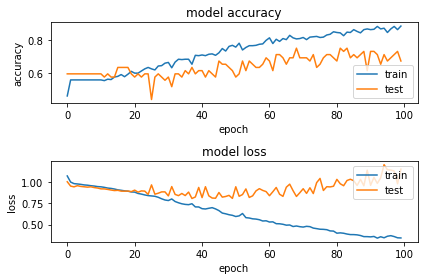

In [24]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [40]:
# Export Data Frame to CSV
model_data = {'Epoch': list(range(100)),'Train Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy'], 'Train Loss': history.history['loss'], 'Test Loss':history.history['val_loss']}
df_TrueVEstimate = pd.DataFrame(data=model_data)
df_TrueVEstimate.to_csv(r'Datasets\FailureType_Prediction.csv', index = False)

In [41]:
print(df_TrueVEstimate)

    Epoch  Train Accuracy  Test Accuracy  Train Loss  Test Loss
0       0        0.463675       0.596154    1.070363   1.002244
1       1        0.559829       0.596154    0.998784   0.951643
2       2        0.559829       0.596154    0.980368   0.942611
3       3        0.559829       0.596154    0.976632   0.956367
4       4        0.559829       0.596154    0.971860   0.947779
..    ...             ...            ...         ...        ...
95     95        0.844017       0.673077    0.364761   1.142753
96     96        0.865385       0.692308    0.371403   1.139291
97     97        0.880342       0.711538    0.361184   1.127695
98     98        0.861111       0.730769    0.346569   0.978467
99     99        0.882479       0.673077    0.344763   1.149705

[100 rows x 5 columns]


Text(69.0, 0.5, 'True label')

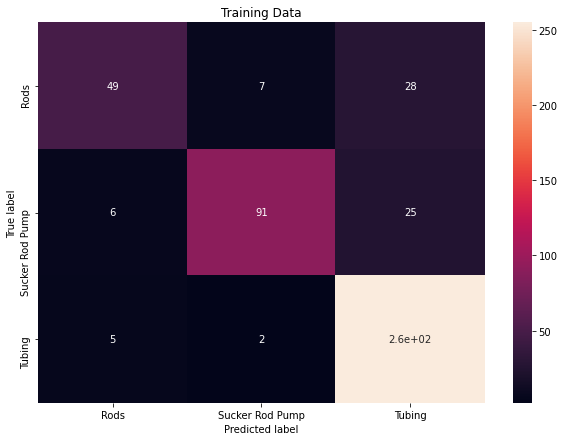

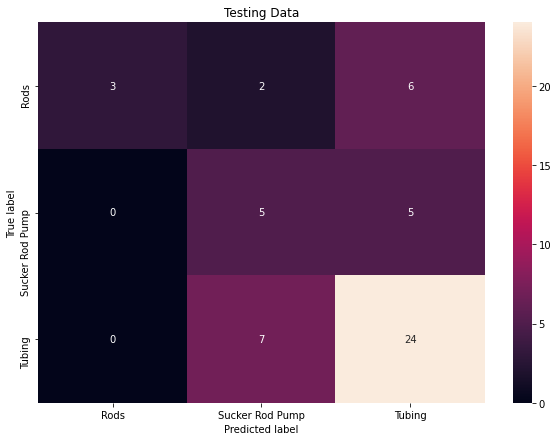

In [36]:
## Check Confusion matrix of Neural Network

# Estimate values for both training and testing data  
y_train_est = np.argmax(model.predict(X_train),axis = 1)
y_train_real = np.argmax(y_train, axis = 1)
y_test_est = np.argmax(model.predict(X_test),axis = 1)
y_test_real = np.argmax(y_test, axis = 1)

# Define Confusion Matrix - Training data
confusion_matrix = np.zeros((3,3))
for i in range(y_train_est.shape[0]):
    estimate = y_train_est[i]
    actual  = y_train_real[i]
    confusion_matrix[actual,estimate] += 1

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]],
                  columns = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Training Data")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Define Confusion Matrix - Testing data
confusion_matrix = np.zeros((3,3))
for i in range(y_test_est.shape[0]):
    estimate = y_test_est[i]
    actual  = y_test_real[i]
    confusion_matrix[actual,estimate] += 1

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]],
                  columns = [i for i in ['Rods', "Sucker Rod Pump", "Tubing"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Testing Data")
plt.xlabel('Predicted label')
plt.ylabel('True label')


## Life Expectation Regressor

In [37]:
# Split Traing/testing data
X_train, X_test, y_train, y_test = train_test_split(Rredictor_scaled, Response_lifespan_scaled, test_size=0.10, random_state=77777)

In [38]:
# Define Input and Output shape
input_shape = (Rredictor_scaled.shape[-1],) 
n_class = 1

# Build a Neural Network
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(n_class, activation='sigmoid')) # <- as output has range of [0,1]

# Compile the Neural Network - define Loss and optimizer to tune the associated weights
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [39]:
# training the Neural Network and saving metrics every 100 epochs
history = model.fit(X_train, y_train,
          batch_size=50, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100
10/10 - 0s - loss: 0.1269 - mae: 0.3429 - val_loss: 0.0973 - val_mae: 0.3038
Epoch 2/100
10/10 - 0s - loss: 0.0638 - mae: 0.2355 - val_loss: 0.0294 - val_mae: 0.1590
Epoch 3/100
10/10 - 0s - loss: 0.0185 - mae: 0.1060 - val_loss: 0.0052 - val_mae: 0.0577
Epoch 4/100
10/10 - 0s - loss: 0.0156 - mae: 0.0760 - val_loss: 0.0055 - val_mae: 0.0588
Epoch 5/100
10/10 - 0s - loss: 0.0155 - mae: 0.0759 - val_loss: 0.0052 - val_mae: 0.0579
Epoch 6/100
10/10 - 0s - loss: 0.0135 - mae: 0.0761 - val_loss: 0.0067 - val_mae: 0.0678
Epoch 7/100
10/10 - 0s - loss: 0.0135 - mae: 0.0819 - val_loss: 0.0072 - val_mae: 0.0713
Epoch 8/100
10/10 - 0s - loss: 0.0133 - mae: 0.0790 - val_loss: 0.0061 - val_mae: 0.0627
Epoch 9/100
10/10 - 0s - loss: 0.0131 - mae: 0.0762 - val_loss: 0.0062 - val_mae: 0.0625
Epoch 10/100
10/10 - 0s - loss: 0.0130 - mae: 0.0782 - val_loss: 0.0071 - val_mae: 0.0684
Epoch 11/100
10/10 - 0s - loss: 0.0126 - mae: 0.0763 - val_loss: 0.0065 - val_mae: 0.0638
Epoch 12/100
10/10 

10/10 - 0s - loss: 0.0030 - mae: 0.0431 - val_loss: 0.0136 - val_mae: 0.0817
Epoch 93/100
10/10 - 0s - loss: 0.0030 - mae: 0.0428 - val_loss: 0.0105 - val_mae: 0.0769
Epoch 94/100
10/10 - 0s - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0117 - val_mae: 0.0777
Epoch 95/100
10/10 - 0s - loss: 0.0030 - mae: 0.0431 - val_loss: 0.0106 - val_mae: 0.0755
Epoch 96/100
10/10 - 0s - loss: 0.0029 - mae: 0.0419 - val_loss: 0.0115 - val_mae: 0.0776
Epoch 97/100
10/10 - 0s - loss: 0.0027 - mae: 0.0407 - val_loss: 0.0107 - val_mae: 0.0759
Epoch 98/100
10/10 - 0s - loss: 0.0028 - mae: 0.0415 - val_loss: 0.0128 - val_mae: 0.0803
Epoch 99/100
10/10 - 0s - loss: 0.0027 - mae: 0.0405 - val_loss: 0.0139 - val_mae: 0.0844
Epoch 100/100
10/10 - 0s - loss: 0.0026 - mae: 0.0403 - val_loss: 0.0126 - val_mae: 0.0797


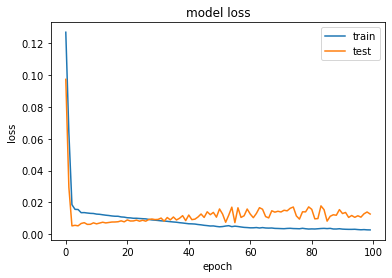

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [41]:
from sklearn.metrics import mean_squared_error

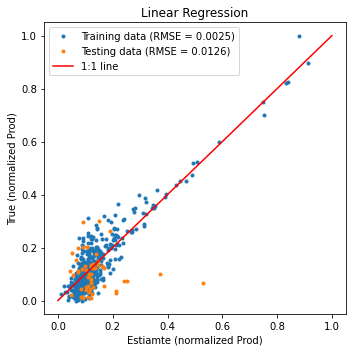

In [42]:
# Estimate values for both training and testing data  
y_train_est = model.predict(X_train)
y_test_est = model.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

# 4. ML - Dimensionality Reduction
* Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) 

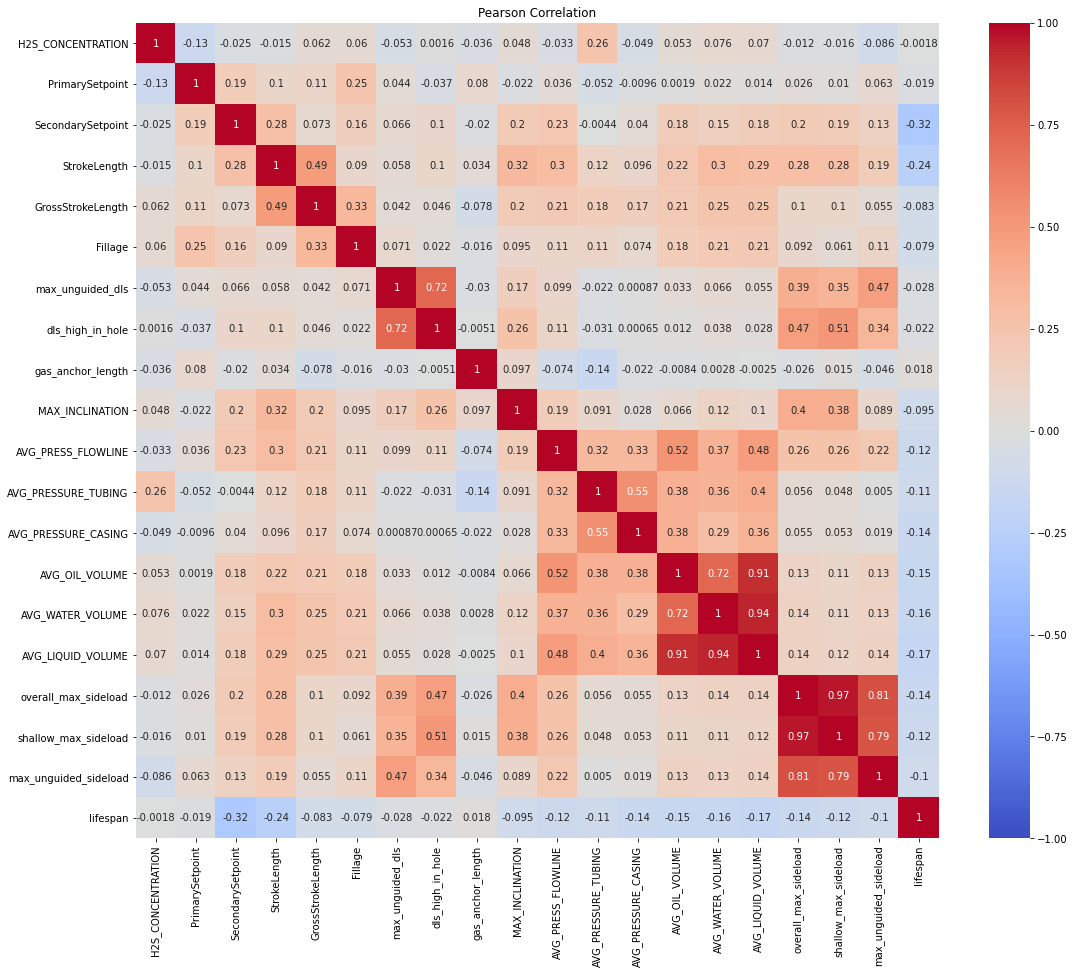

In [43]:
# Corr Coefficient of entire features
list_ = list_predictor_continuous.copy(); list_.append('lifespan')
plt.figure(figsize = (18,15))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

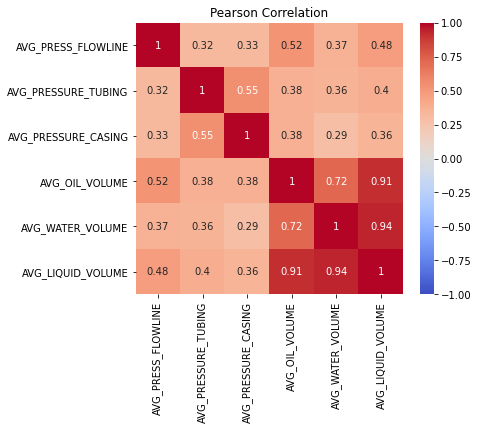

In [44]:
# Subset of the above corr. coefficient matrix
list_ = ['AVG_PRESS_FLOWLINE',
       'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING', 'AVG_OIL_VOLUME',
       'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME',]
plt.figure(figsize = (6,5))
plt.title('Pearson Correlation')
sns.heatmap(df.loc[:,list_].corr(method='pearson'), vmin=-1, vmax = 1, cmap='coolwarm', annot=True);

From the above correlation matrix, we observe there are high corrliearity. Here we will decomstrate dimensionality reduction for these 6 features.

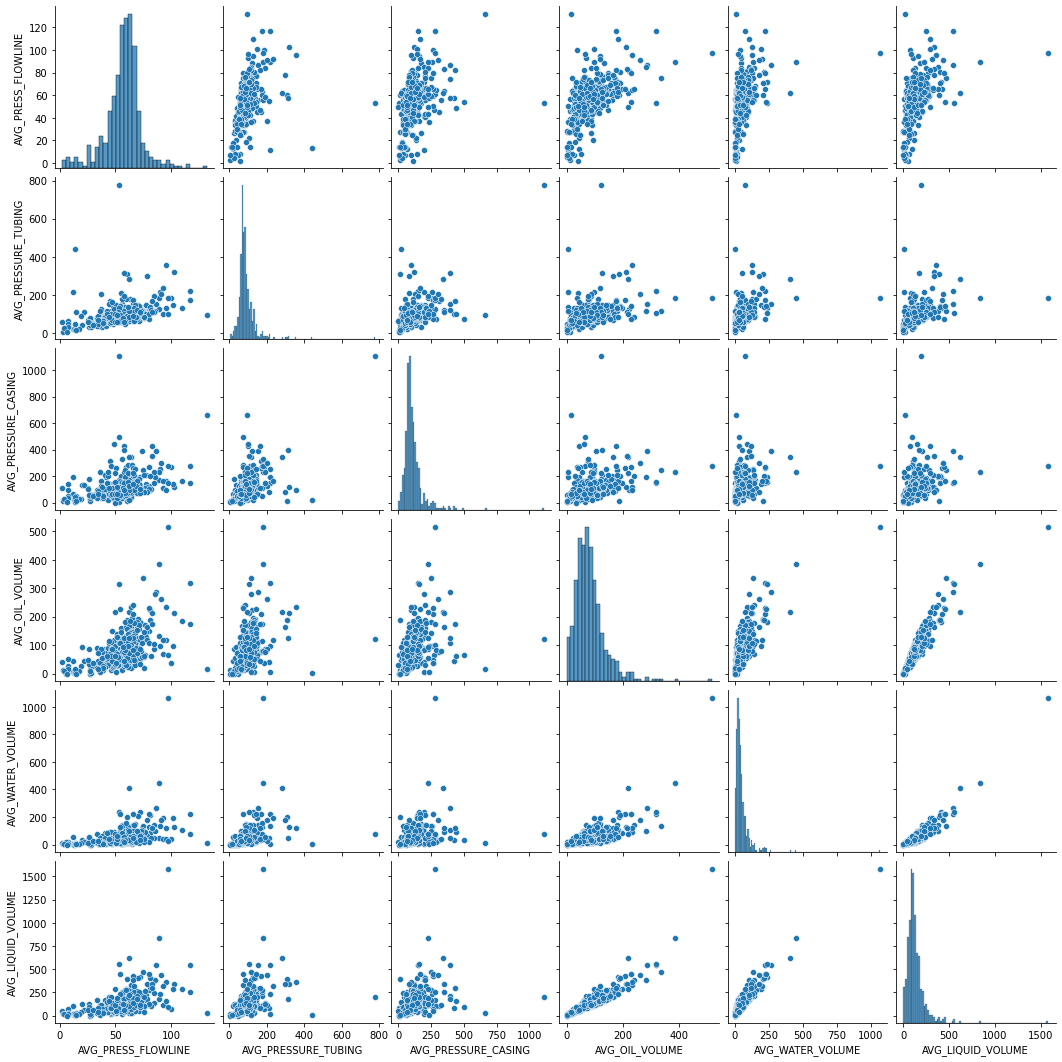

In [45]:
# Select 4 variables from data frame
df_subset_pca = df.loc[:,list_]

# If we visualze pairplot of these variables:
sns.pairplot(df_subset_pca)

# Again, we need to do preprocess data (i.e., Standardization or normalization) before applying PCA
scaler = StandardScaler()
var_std = scaler.fit_transform(df_subset_pca)

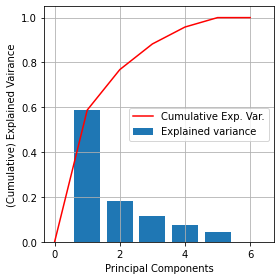

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(var_std);

# plot explained variance vs. # of PC
plt.figure(figsize = (4,4))
plt.bar(x = np.arange(1,7), height= pca.explained_variance_ratio_, label = 'Explained variance')
cum_ev = [0]; 
for i in range(6):cum_ev.append(sum(pca.explained_variance_ratio_[:i+1])) 
plt.plot(np.arange(0,7), cum_ev, '-r', label = 'Cumulative Exp. Var.')
plt.xlabel('Principal Components')
plt.ylabel('(Cumulative) Explained Vairance')
plt.legend()
plt.grid('on')
plt.tight_layout()

Only with 2 PC, we can explain around 80% information we have. Let's do it with 2 PC.

Text(0.5, 1.0, 'Samples in 2D space')

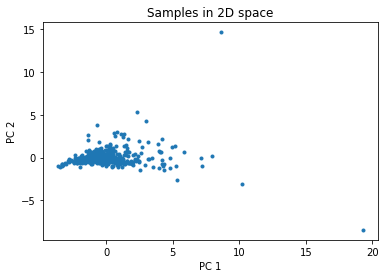

In [47]:
# map 4-dimensional variables to 2D
pca = PCA(n_components=2)
var_std_reduced = pca.fit_transform(var_std);

# Visualizing data in 2D
plt.plot(var_std_reduced[:,0],var_std_reduced[:,1], '.')
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.title('Samples in 2D space')

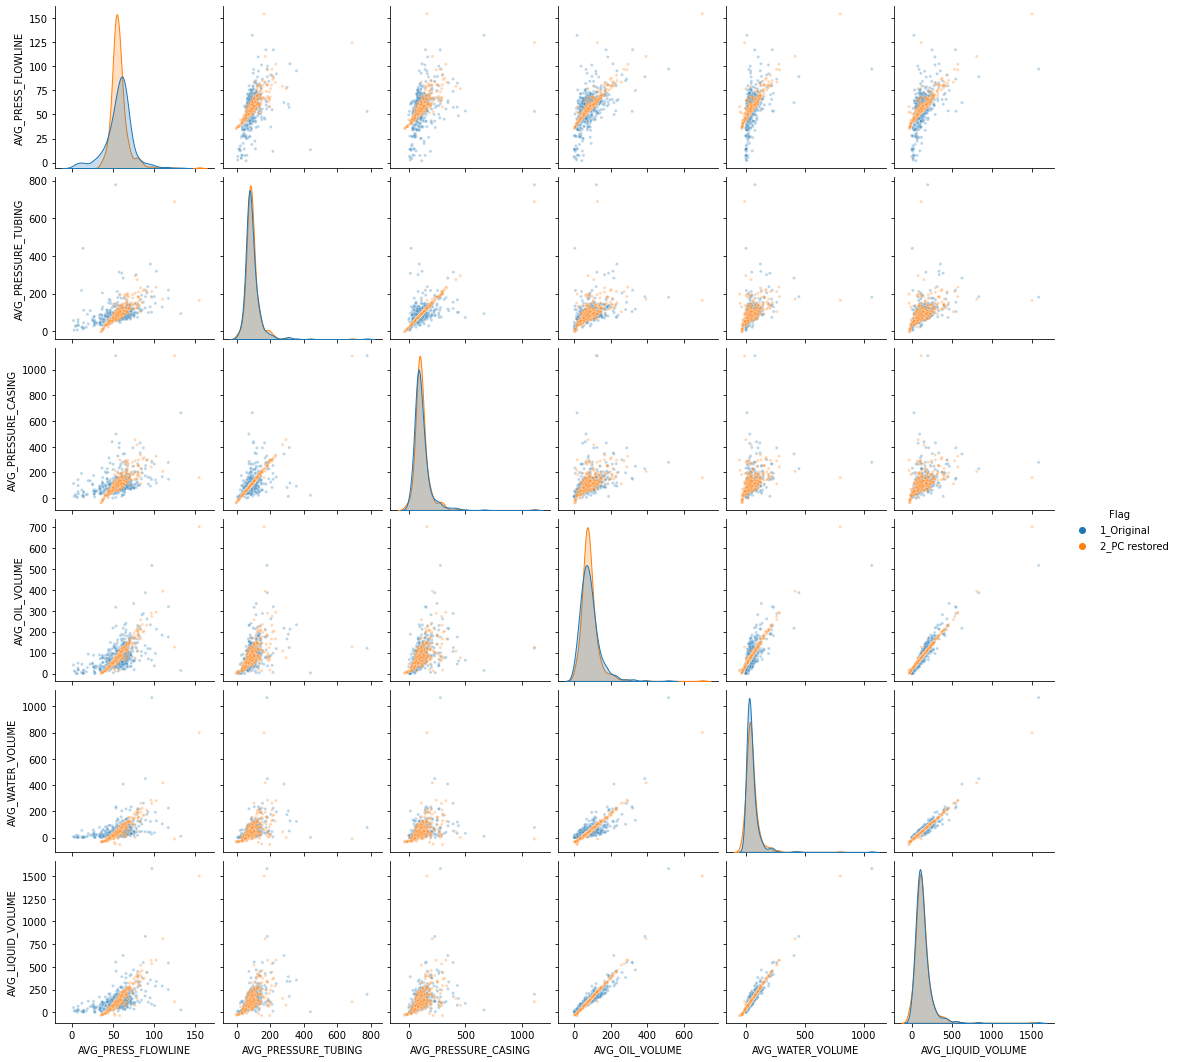

In [48]:
# Restore the reduced dimensionality to the original dimension:
var_std_restore = pca.inverse_transform(var_std_reduced)

# Restore the original scale
var_restore = scaler.inverse_transform(var_std_restore)
df_subset_pca_restore = pd.DataFrame(data = var_restore, columns = list_)

# If we visualze pairplot of the restored variables:
df_subset_pca ['Flag'] = '1_Original'
df_subset_pca_restore ['Flag'] = '2_PC restored'
df_subset_pca_restore = pd.concat([df_subset_pca, df_subset_pca_restore])
sns.pairplot(df_subset_pca_restore, plot_kws = dict(alpha = 0.3, marker = '.'), hue='Flag')

# 5. ML - Clustering
* [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) - make clusters to make euclidean distances (i.e., **inertia**) among samples in each cluster minimized. Hyperparameter = # of cluster

Let's apply clustering to sample in 2D space. We had

Text(0.5, 1.0, 'Samples in 2D space')

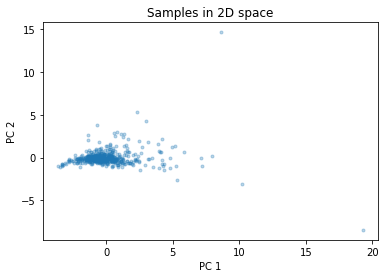

In [49]:
# Visualizing data in 2D
plt.plot(var_std_reduced[:,0],var_std_reduced[:,1], '.', alpha = 0.3)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.title('Samples in 2D space')

Text(0.5, 1.0, 'Samples in 2D space')

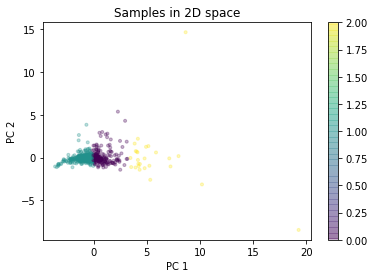

In [50]:
# Apply Kmeans clustering to PC reduced samples
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(var_std_reduced)
cluster_label = kmeans.predict(var_std_reduced)

plt.scatter(var_std_reduced[:,0],var_std_reduced[:,1], alpha = 0.3, marker='.', c = cluster_label)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.colorbar()
plt.title('Samples in 2D space')

How can we select best # of cluster in Kmeans? we should check loss of Kmeans with varying # cluster 

Text(0.5, 1.0, 'Select the optimum # of cluster')

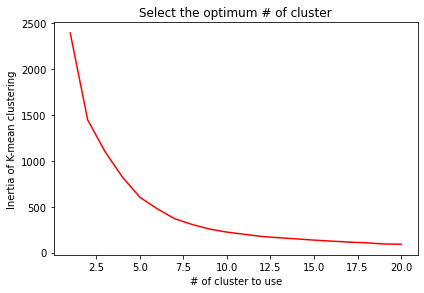

In [51]:
Inertia_ = [] # <- we will save Loss of K means here
for i in range(1,21):
    kmeans = KMeans(n_clusters = i).fit(var_std_reduced)
    Inertia_.append(kmeans.inertia_)

plt.plot(np.arange(1,21), Inertia_, '-r')
plt.xlabel('# of cluster to use')
plt.ylabel('Inertia of K-mean clustering')
plt.tight_layout()
plt.title('Select the optimum # of cluster')

Text(0.5, 1.0, 'Samples in 2D space')

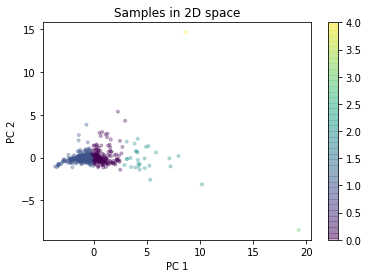

In [52]:
# Let's apply 5 clusters
kmeans = KMeans(n_clusters = 5)
cluster_label = kmeans.fit_predict(var_std_reduced)
plt.scatter(var_std_reduced[:,0],var_std_reduced[:,1], alpha = 0.3, marker='.', c = cluster_label)
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.colorbar()
plt.title('Samples in 2D space')